# 1. Imports

In [24]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras

# 2. Load the Data

In [27]:
current_dir = "/data"
data_path = os.path.join(data_dir, "mnist.npz")

if not os.path.exists(data_dir):
    os.mkdir(data_dir)

(training_images, training_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data(path=data_path)

# 3. Inspect the Data

In [12]:
data_shape = training_images.shape

print(f"There are {data_shape[0]} examples with shape ({data_shape[1]}, {data_shape[0]})")

There are 60000 examples with shape (28, 60000)


# 4. Pre-processing the Data

In [16]:
def reshape_and_normalize(images):
    images = np.expand_dims(images, axis=-1)
    images = images / 255.

    return images

In [18]:
training_images = reshape_and_normalize(training_images)

print(f"Maximum pixel value after normalization: {np.max(training_images)}")
print(f"Shape of training set after reshaping: {training_images.shape}")

Maximum pixel value after normalization: 1.0
Shape of training set after reshaping: (60000, 28, 28, 1)


# 5. Defining a Callback

In [19]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if(logs.get('accuracy') > 0.99):
            print("\nAccuracy is higher than 0.99 so stopping training!")
            self.model.stop_training = True

# 6. Defining the Models

In [32]:
dense_model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

dense_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

callbacks = myCallback()
dense_model.fit(training_images, training_labels, epochs=10, callbacks=[callbacks])

test_lost_dense = dense_model.evaluate(test_images, test_labels)

Epoch 1/10
1875/1875 [==============================] - 1s 727us/step - loss: 2.1315 - accuracy: 0.8556
Epoch 2/10
1875/1875 [==============================] - 1s 701us/step - loss: 0.3818 - accuracy: 0.9071
Epoch 3/10
1875/1875 [==============================] - 1s 728us/step - loss: 0.2992 - accuracy: 0.9261
Epoch 4/10
1875/1875 [==============================] - 1s 729us/step - loss: 0.2493 - accuracy: 0.9362
Epoch 5/10
1875/1875 [==============================] - 1s 711us/step - loss: 0.2270 - accuracy: 0.9430
Epoch 6/10
1875/1875 [==============================] - 1s 716us/step - loss: 0.2118 - accuracy: 0.9474
Epoch 7/10
1875/1875 [==============================] - 1s 707us/step - loss: 0.2072 - accuracy: 0.9488
Epoch 8/10
1875/1875 [==============================] - 1s 691us/step - loss: 0.1917 - accuracy: 0.9537
Epoch 9/10
1875/1875 [==============================] - 1s 710us/step - loss: 0.1908 - accuracy: 0.9548
Epoch 10/10
313/313 [==============================] - 0s 480us/

In [35]:
conv_model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

conv_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

callbacks = myCallback()
conv_model.fit(training_images, training_labels, epochs=10, callbacks=[callbacks])

test_lost_dense = dense_model.evaluate(test_images, test_labels)

Epoch 1/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3446 - accuracy: 0.9506
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0630 - accuracy: 0.9811
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0487 - accuracy: 0.9845
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0421 - accuracy: 0.9876
Epoch 5/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0359 - accuracy: 0.9888
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0313 - accuracy: 0.9907
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0267 - accuracy: 0.9923
Epoch 8/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0235 - accuracy: 0.9934
Epoch 9/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0213 - accuracy: 0.9936
Epoch 10/10
313/313 [==============================] - 0s 478us/step - lo

# 7. Inspecting the Convolutional Layers

1/1 [==============================] - 0s 10ms/step


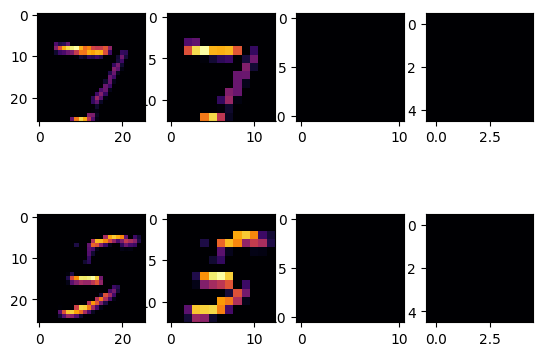

In [50]:
import matplotlib.pyplot as plt

# (2,4) plot because we are inspecting the two convolution and the two mapping layers
f, axarr = plt.subplots(2, 4)

FIRST_IMAGE = 0
SECOND_IMAGE = 23
# inspecting a result of a specific filter
CONVOLUTION_NUMBER = 1

layer_outputs = [layer.output for layer in conv_model.layers]

# Create a new model that maps the input image to the outputs of all layers
activation_model = tf.keras.models.Model(inputs = conv_model.input, outputs = layer_outputs)

for x in range(0,4):
    # Predict activations for the first image in the test set
    f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1,28,28,1))[x]
    # Display the activation map for the specified convolution number
    axarr[0,x].imshow(f1[0, :, :, CONVOLUTION_NUMBER], cmap='inferno')
    axarr[0,x].grid(False)

    f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1,28,28,1))[x]
    axarr[1,x].imshow(f2[0, :, :, CONVOLUTION_NUMBER], cmap='inferno')
    axarr[1,x].grid(False)